# Penn World Table in Python

Author: Luc Hens

Version: 19 January 2022

Description: Python code to read the Penn World Table and store the data in a dataframe called `pwt`. Some examples of manipulations of series, subsetting of data, tables, graphs, and computations.

Go to the Penn WorldTable home page (https://www.rug.nl/ggdc/productivity/pwt/) for the latest version of the Penn World Table. On 14 January 2022, the latest version was 10.0. The corresponding Stata data file was `pwt100.dta` (`pwt` stands for Penn World Table; `.dta` is the file extension for Stata data files). The path to the file was `https://www.rug.nl/ggdc/docs/pwt100.dta`.

When using the Penn World Table, make sure to document the source as explained in the "Attribution requirement" on https://www.rug.nl/ggdc/productivity/pwt/. 

The **documentation** (variable names,	variable definitions, units of measurement etc.) is stored in an Excel spreadsheet on https://www.rug.nl/ggdc/productivity/pwt/ (Info and Legend tabs). To extract this information from the spreadsheet (**warning**: this may take a while --be patient: 

In [1]:
import pandas as pd
pwt_info   = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx', sheet_name="Info")   # read information on pwt
pwt_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx', sheet_name="Legend") # read legend
# make sure that you use the most recent version (pwt100 refers to Penn World Table 10.0)
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    left_aligned_pwt_legend = pwt_legend.style.set_properties(**{'text-align': 'left'}) # .style.set_properties(**{'text-align': 'left'}) is to left-align columns when displaying
    display(left_aligned_pwt_legend) 

,Variable name,Variable definition
0,Identifier variables,nan
1,countrycode,3-letter ISO country code
2,country,Country name
3,currency_unit,Currency unit
4,year,Year
5,nan,nan
6,"Real GDP, employment and population levels",nan
7,rgdpe,Expenditure-side real GDP at chained PPPs (in mil. 2017US$)
8,rgdpo,Output-side real GDP at chained PPPs (in mil. 2017US$)
9,pop,Population (in millions)


In [3]:
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    left_aligned_pwt_info = pwt_info.style.set_properties(**{'text-align': 'left'})  # to left-align columns when displaying
    display(left_aligned_pwt_info)

,"Penn World Table, version 10.0"
0,nan
1,"This file contains the data of PWT 10.0, as available on www.ggdc.net/pwt"
2,Please refer to www.ggdc.net/pwt for extensive documentation of the different concepts and how these data were constructed
3,nan
4,"When using these data, please refer to the following paper:"
5,"Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), ""The Next Generation of the Penn World Table"" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt"
6,nan
7,Note
8,"Revision of June 2021. Please consult the change log for an overview of the changes, available on https://www.rug.nl/ggdc/productivity/pwt/pwt-releases/pwt100"


Read the Penn World Table using `pandas`:

In [5]:
import pandas as pd
pwt = pd.read_stata("https://www.rug.nl/ggdc/docs/pwt100.dta") # We use pwt as the name for the dataframe
# make sure that you use the most recent version (pwt100 refers to Penn World Table 10.0)

In [6]:
pwt.tail()   # the last lines (cases) of the data frame

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120
12809,ZWE,Zimbabwe,US Dollar,2019,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,...,0.213562,-0.270959,-0.089798,0.494755,0.652439,0.500927,0.487763,0.430082,0.420675,1.384068


In [7]:
pwt.head()   # the first lines (cases) of the data frame

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Change the data type of `year`

The Penn World Table is a panel data set: it combines time series data (yearly data starting in 1950) and cross-sectional data (countries). When the data file was read by pandas, the series `year` was assigned as data type: integer. It is a good idea to change the data type to `datetime`. Let us first verify the data types of the variables:

In [9]:
pwt.dtypes  # show data types of the variables (series) in dataframe pwt

countrycode        object
country            object
currency_unit      object
year                int16
rgdpe             float32
rgdpo             float32
pop               float64
emp               float32
avh               float64
hc                float32
ccon              float32
cda               float32
cgdpe             float32
cgdpo             float32
cn                float32
ck                float32
ctfp              float32
cwtfp             float32
rgdpna            float32
rconna            float32
rdana             float32
rnna              float32
rkna              float32
rtfpna            float32
rwtfpna           float32
labsh             float32
irr               float32
delta             float32
xr                float64
pl_con            float32
pl_da             float32
pl_gdpo           float32
i_cig            category
i_xm             category
i_xr             category
i_outlier        category
i_irr            category
cor_exp           float64
statcap     

Another way (that gives more information) to do this is:

In [10]:
pwt.info()   # technical information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   countrycode    12810 non-null  object  
 1   country        12810 non-null  object  
 2   currency_unit  12810 non-null  object  
 3   year           12810 non-null  int16   
 4   rgdpe          10399 non-null  float32 
 5   rgdpo          10399 non-null  float32 
 6   pop            10399 non-null  float64 
 7   emp            9529 non-null   float32 
 8   avh            3492 non-null   float64 
 9   hc             8637 non-null   float32 
 10  ccon           10399 non-null  float32 
 11  cda            10399 non-null  float32 
 12  cgdpe          10399 non-null  float32 
 13  cgdpo          10395 non-null  float32 
 14  cn             10314 non-null  float32 
 15  ck             7095 non-null   float32 
 16  ctfp           6412 non-null   float32 
 17  cwtfp          6412 non-null   

We can see that the datatype of `year` is: `int64` (an integer). Let us verify:

In [12]:
print(pwt.year)

0        1950
1        1951
2        1952
3        1953
4        1954
         ... 
12805    2015
12806    2016
12807    2017
12808    2018
12809    2019
Name: year, Length: 12810, dtype: int16


Let us now change the datatype of `year` to `datetime` (https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html ; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html ; https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime ):

In [81]:
import pandas as pd
from datetime import datetime 
pwt['year'] = pd.to_datetime(pwt.year, format='%Y')  # variable year is converted to datetime type 
display(pwt.year) 

0       1950-01-01
1       1951-01-01
2       1952-01-01
3       1953-01-01
4       1954-01-01
5       1955-01-01
6       1956-01-01
7       1957-01-01
8       1958-01-01
9       1959-01-01
10      1960-01-01
11      1961-01-01
12      1962-01-01
13      1963-01-01
14      1964-01-01
15      1965-01-01
16      1966-01-01
17      1967-01-01
18      1968-01-01
19      1969-01-01
20      1970-01-01
21      1971-01-01
22      1972-01-01
23      1973-01-01
24      1974-01-01
25      1975-01-01
26      1976-01-01
27      1977-01-01
28      1978-01-01
29      1979-01-01
30      1980-01-01
31      1981-01-01
32      1982-01-01
33      1983-01-01
34      1984-01-01
35      1985-01-01
36      1986-01-01
37      1987-01-01
38      1988-01-01
39      1989-01-01
40      1990-01-01
41      1991-01-01
42      1992-01-01
43      1993-01-01
44      1994-01-01
45      1995-01-01
46      1996-01-01
47      1997-01-01
48      1998-01-01
49      1999-01-01
50      2000-01-01
51      2001-01-01
52      2002

Note that `1950` has changed to `1950-01-01` etc. We have to bear that in mind when we work with the variable `year` from now on.

## Change the variable name  of `pop`

The name of the population variable is `pop`. Because `pop` is also the name of the pandas function to drop an item from a data frame, we'll rename the variable (column) name `pop` to `population` using the `rename()` functiom from pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html;  https://www.geeksforgeeks.org/python-pandas-dataframe-rename/  )

In [15]:
pwt.rename(columns = {"pop": "population"}, inplace = True)

In [82]:
# Show variable (column) names: 
list(pwt)

['countrycode',
 'country',
 'currency_unit',
 'year',
 'rgdpe',
 'rgdpo',
 'population',
 'emp',
 'avh',
 'hc',
 'ccon',
 'cda',
 'cgdpe',
 'cgdpo',
 'cn',
 'ck',
 'ctfp',
 'cwtfp',
 'rgdpna',
 'rconna',
 'rdana',
 'rnna',
 'rkna',
 'rtfpna',
 'rwtfpna',
 'labsh',
 'irr',
 'delta',
 'xr',
 'pl_con',
 'pl_da',
 'pl_gdpo',
 'i_cig',
 'i_xm',
 'i_xr',
 'i_outlier',
 'i_irr',
 'cor_exp',
 'statcap',
 'csh_c',
 'csh_i',
 'csh_g',
 'csh_x',
 'csh_m',
 'csh_r',
 'pl_c',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'pl_n',
 'pl_k']

In [17]:
# To get a list of the country names without duplicates: (there must be a more elegant way to do this)
a = pwt.country.value_counts()
pd.set_option('display.max_rows', pwt.shape[0]+1)  # to display all rows of a
display(a)

Aruba                                 70
Mongolia                              70
Mauritania                            70
Montserrat                            70
Mauritius                             70
Malawi                                70
Malaysia                              70
Namibia                               70
Niger                                 70
Nigeria                               70
Nicaragua                             70
Netherlands                           70
Norway                                70
Nepal                                 70
New Zealand                           70
Oman                                  70
Pakistan                              70
Panama                                70
Peru                                  70
Philippines                           70
Poland                                70
Mozambique                            70
Montenegro                            70
Paraguay                              70
Myanmar         

In [12]:
# Another way to get a list of the country names without duplicates: (there must be a more elegant way to do this)
# (see https://www.w3schools.com/python/python_howto_remove_duplicates.asp)
mylist = pwt["country"]
mylist = list(dict.fromkeys(mylist)) # Create a dictionary, using the List items as keys. This will automatically remove any duplicates because dictionaries cannot have duplicate keys.
display(mylist)

['Aruba',
 'Angola',
 'Anguilla',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'D.R. of the Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Greece',
 'Grenada',
 

## Add variables to the dataframe (I still need to fix this part):
We need some additional variables:  real GDP per person (`rgde/pop`), real GDP per worker (`rgde/emp`), physical capital per worker (`cn/emp`), `emp/pop`

(I want to do this for the full dataset but Python gives an error message whenever there is an NaN. Find out how to compute say rgdpe/pop for the full data set with Python giving an NaN whenever rgdpe or pop is NaN.) Something like (in pseudo code): if rgdpe is NaN or pop is Nan then rgdpe_over_pop = NaN; else rgdpe_over_pop = rgdpe/pop). Use numpy isnan() ? https://www.geeksforgeeks.org/numpy-isnan-python/

It seems the map() function does the trick: https://towardsdatascience.com/understand-map-function-to-manipulate-pandas-series-8ac340d514f7 

In [ ]:
# I first have to omit rows where rgdpe or pop is not available - dropna()
# see: https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/
# pwt.dropna() # that is too crude; only omit rows where rgdpe or pop is not available
# pwt_without_NaN = pwt.dropna(subset=["rgdpe","pop"])  # this omits **all** rows with an NaN
# pwt2 = pwt_without_NaN.assign(rgdpe_over_pop = pwt.rgdpe/pwt.pop)  # add column with rgdpe/pop 


## Subsetting the data set: select one country
Subsetting in pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html 

Select only Belgium:

In [90]:
BEL_data = pwt[(pwt['country'] == 'Belgium')]
BEL_data.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,population,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
840,BEL,Belgium,Euro,1950-01-01,75285.921875,72084.273438,8.634331,3.458556,2096.149067,2.203547,...,0.247399,-0.319206,0.031320,0.095873,0.071657,0.105654,0.096377,0.087559,0.047010,NaN
841,BEL,Belgium,Euro,1951-01-01,80468.148438,75056.812500,8.673325,3.455584,2085.919417,2.219054,...,0.310107,-0.377327,0.034456,0.101509,0.090487,0.110525,0.116098,0.094075,0.061627,NaN
842,BEL,Belgium,Euro,1952-01-01,82140.664062,76747.523438,8.725314,3.457593,2075.739691,2.234670,...,0.292051,-0.349589,0.033688,0.102782,0.093724,0.117864,0.116107,0.094884,0.064790,NaN
843,BEL,Belgium,Euro,1953-01-01,82216.664062,79178.101562,8.772754,3.457588,2065.609644,2.250396,...,0.290956,-0.319783,0.032753,0.105929,0.087386,0.118173,0.103975,0.096556,0.060019,NaN
844,BEL,Belgium,Euro,1954-01-01,85718.101562,82787.773438,8.814237,3.455043,2055.529033,2.266232,...,0.305787,-0.340928,0.030507,0.106509,0.087266,0.118498,0.099709,0.094436,0.059330,0.633295


## Subsetting the data set: select variables 

Select the variables (columns, Series) we'll need: year, country, rgdpe, pop, emp, cn, hc:

In [89]:
my_data = BEL_data[["country", "year", "rgdpe", "population", "emp", "cn", "hc"]]
my_data.head()

,country,year,rgdpe,population,emp,cn,hc
840,Belgium,1950-01-01,75285.921875,8.634331,3.458556,388744.40625,2.203547
841,Belgium,1951-01-01,80468.148438,8.673325,3.455584,396413.09375,2.219054
842,Belgium,1952-01-01,82140.664062,8.725314,3.457593,404938.12500,2.234670
843,Belgium,1953-01-01,82216.664062,8.772754,3.457588,413281.90625,2.250396
844,Belgium,1954-01-01,85718.101562,8.814237,3.455043,424545.96875,2.266232


## Subsetting the data set:  select a single value

Display the row for Belgium in 2019:

In [23]:
pwt[(pwt["year"] == "2019-01-01") & (pwt["country"] == "Belgium")]

,countrycode,country,currency_unit,year,rgdpe,rgdpo,population,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
909,BEL,Belgium,Euro,2019-01-01,589449.125,517419.75,11.539328,4.921937,1586.430997,3.149034,...,1.248496,-1.362421,2.183753e-16,0.946841,0.704665,1.167271,0.667259,0.60686,0.626652,0.586336


Display population (`rgdpe`, in millions) for Belgium in 2019:

In [26]:
pwt[(pwt["year"] == "2019-01-01") & (pwt["country"] == "Belgium")].rgdpe

909    589449.125
Name: rgdpe, dtype: float32

Display labor force (`emp`, in millions) for Belgium in 2019:

In [27]:
pwt[(pwt["year"] == "2019-01-01") & (pwt["country"] == "Belgium")].emp

909    4.921937
Name: emp, dtype: float32

## Make a time series diagram of real GDP
If we use `rgdpe`, the vertical axis shows real GDP in millions of $. Usually GDP is expressed in billions, so first we add column with `rgdpe` expressed in billions:

In [28]:
my_data = my_data.assign(rgdpe_in_billions = my_data.rgdpe/10**3)  

Time series plot of rgdpe (expressed in billions) for Belgium:

<Figure size 720x360 with 0 Axes>

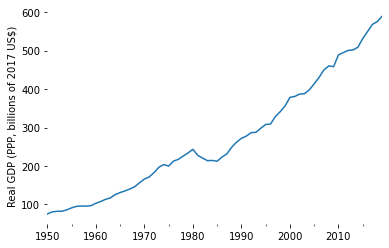

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
my_data.plot('year', 'rgdpe_in_billions', legend=False)  
plt.box(False)   # get rid of the box
plt.xlabel('')   # label on x-axis
plt.ylabel('Real GDP (PPP, billions of 2017 US$)')     # add label on y-axis; rgdpe: Expenditure-side real GDP at chained PPPs (in mil. 2017US$)
plt.show() 

## Compute new variables

Compute real GDP per person (pay attention to units: `rgdpe` is in millions of international dollars, `pop` is in millions)

In [30]:
my_data.population # remember that we changed the variable of pop to population

840     8.634331
841     8.673325
842     8.725314
843     8.772754
844     8.814237
845     8.863303
846     8.918641
847     8.983869
848     9.047428
849     9.098420
850     9.113383
851     9.160455
852     9.213024
853     9.277687
854     9.361537
855     9.442590
856     9.502256
857     9.550928
858     9.584208
859     9.607095
860     9.632180
861     9.663324
862     9.692846
863     9.720761
864     9.747020
865     9.771586
866     9.794777
867     9.816696
868     9.836814
869     9.854377
870     9.868995
871     9.880592
872     9.889824
873     9.897880
874     9.906371
875     9.916578
876     9.928542
877     9.942289
878     9.959020
879     9.980176
880    10.006544
881    10.039445
882    10.078101
883    10.118674
884    10.155919
885    10.186305
886    10.208275
887    10.223789
888    10.237299
889    10.255160
890    10.282033
891    10.319019
892    10.364885
893    10.419032
894    10.480117
895    10.546886
896    10.619475
897    10.697572
898    10.7787

In [91]:
my_data = my_data.assign(real_gdp_per_person = my_data.rgdpe/my_data.population) # real GDP per person
my_data = my_data.assign(real_gdp_per_worker = my_data.rgdpe/my_data.emp)        # real GDP per worker
my_data = my_data.assign(physical_capital_per_worker = my_data.cn/my_data.emp)   # physical capital per worker
my_data = my_data.assign(emp_over_pop = my_data.emp/my_data.population)          # ratio emp/pop
my_data.head()

,country,year,rgdpe,population,emp,cn,hc,real_gdp_per_person,real_gdp_per_worker,physical_capital_per_worker,emp_over_pop
840,Belgium,1950-01-01,75285.921875,8.634331,3.458556,388744.40625,2.203547,8719.369419,21768.023438,112400.796875,0.400559
841,Belgium,1951-01-01,80468.148438,8.673325,3.455584,396413.09375,2.219054,9277.658625,23286.414062,114716.687500,0.398415
842,Belgium,1952-01-01,82140.664062,8.725314,3.457593,404938.12500,2.234670,9414.064198,23756.599609,117115.601562,0.396272
843,Belgium,1953-01-01,82216.664062,8.772754,3.457588,413281.90625,2.250396,9371.818862,23778.619141,119528.968750,0.394128
844,Belgium,1954-01-01,85718.101562,8.814237,3.455043,424545.96875,2.266232,9724.960091,24809.558594,122877.179688,0.391984


## Time series diagram comparing income per person and labor productivity

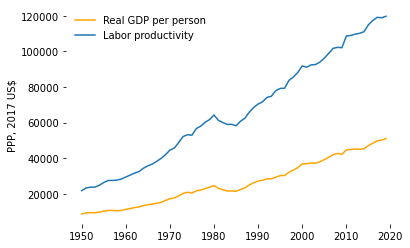

In [34]:
import matplotlib.pyplot as plt
plt.figure() # to set the plot size:   plt.figure(figsize=(16, 8), dpi=150)
plt.box(False)   # get rid of the box
plt.xlabel('')   # label on x-axis
plt.ylabel('PPP, 2017 US$')     # add label on y-axis; rgdpe: Expenditure-side real GDP at chained PPPs (in mil. 2017US$)
# Plot a line chart:
plt.plot(my_data.year, my_data.real_gdp_per_person, label='Real GDP per person', color='orange')
plt.plot(my_data.year, my_data.real_gdp_per_worker, label='Labor productivity')
plt.legend(edgecolor="None")    # adding legend to the curve (but is better to label the lines - see below)
plt.show() 

Same time series diagram without legend but with labels next to the lines: 
( https://www.statology.org/matplotlib-add-text/: ` matplotlib.pyplot.text(x, y, s, fontdict=None)`)

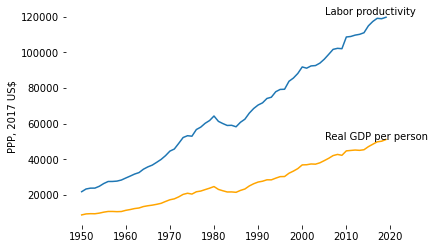

In [80]:
import matplotlib.pyplot as plt
plt.figure() # to set the plot size:   plt.figure(figsize=(16, 8), dpi=150)
plt.box(False)   # get rid of the box
plt.xlabel('')   # label on x-axis
plt.ylabel('PPP, 2017 US$')     # add label on y-axis; rgdpe: Expenditure-side real GDP at chained PPPs (in mil. 2017US$)
# Plot a line chart:
plt.plot(my_data.year, my_data.real_gdp_per_person, color='orange')
plt.plot(my_data.year, my_data.real_gdp_per_worker)
plt.text(len(pwt.year), 50000, 'Real GDP per person', horizontalalignment='left', verticalalignment='bottom')   # still to fix: replace 50000 by last value of variable
plt.text(len(pwt.year),120000, 'Labor productivity' , horizontalalignment='left', verticalalignment='bottom')   # still to fix: replace 120000 by last value of variable
plt.show() 

In [60]:
len(pwt.year)

12810

Make a **scatter plot** to show **correlation** between labor productivity and real GDP per person:

0.9973

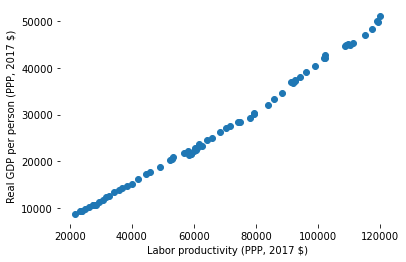

In [36]:
import matplotlib.pyplot as plt
plt.figure() # to set the plot size:   plt.figure(figsize=(16, 8), dpi=150)
plt.box(False)             # get rid of the box
# plt.title("text") # add title
plt.xlabel("Labor productivity (PPP, 2017 $)")  # add label to x-axis
plt.ylabel("Real GDP per person (PPP, 2017 $)")  # add label to y-axis
plt.scatter(my_data.real_gdp_per_worker,my_data.real_gdp_per_person)   

# coefficient of correlation:
corr = my_data.real_gdp_per_person.corr(my_data.real_gdp_per_worker)
import numpy as np
np.round(corr,4)  # round result to four decimals

## Average annual growth rate of `rgdpe` between two years:

In [56]:
begin_period = 2000
end_period   = 2019
country_selected = "China"

# we use the formula using natural logarithms to find an average annual growth rate:
import numpy as np
# value at begin_period: 
begin_value = pwt[(pwt["year"] == pd.to_datetime(begin_period, format='%Y')) & (pwt["country"] == country_selected)].rgdpe
print(begin_period,begin_value)
# value at end_period:
end_value   = pwt[(pwt["year"] == pd.to_datetime(end_period, format='%Y'))   & (pwt["country"] == country_selected)].rgdpe
print(end_period,end_value)
print(begin_period,np.log(begin_value))
print(end_period,np.log(end_value))
# average annual growth rate:
g = (float(np.log(end_value)) - float(np.log(begin_value))) / (end_period - begin_period) 
# I had to add float() to make this work
print(g) 
# multiply by 100% to get the percentage growth rate:
print("The average annual growth rate of rgdpe", 
      "in", country_selected, "between", 
      begin_period, "and" , end_period, "was" , np.round(g*100,2),"percent.")

2000 2360    5514430.0
Name: rgdpe, dtype: float32
2019 2379    20056066.0
Name: rgdpe, dtype: float32
2000 2360    15.522879
Name: rgdpe, dtype: float32
2019 2379    16.814043
Name: rgdpe, dtype: float32
0.06795602095754523
The average annual growth rate of rgdpe in China between 2000 and 2019 was 6.8 percent.
